In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from input_data import INPUT_DATA
from create_dataset import create_datastructure

%matplotlib inline

### Gather Data

In [2]:
# get data
data = create_datastructure(INPUT_DATA)

In [3]:
# create a dataframe
df = pd.DataFrame.from_dict(data, orient='index')
df.head(5)

,GuideSession,GuideDownload,ConnectionRequested,PhotoUpload
757,22.0,2.0,NaN,NaN
194,5.0,1.0,1.0,14.0
1656,32.0,1.0,NaN,NaN
563,11.0,1.0,NaN,2.0
1276,13.0,1.0,NaN,NaN


### Assess Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 757 to 1789
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GuideSession         2489 non-null   float64
 1   GuideDownload        2488 non-null   float64
 2   ConnectionRequested  510 non-null    float64
 3   PhotoUpload          676 non-null    float64
dtypes: float64(4)
memory usage: 97.7 KB


In [5]:
df = df.reset_index()

In [6]:
df.head()

,index,GuideSession,GuideDownload,ConnectionRequested,PhotoUpload
0,757,22.0,2.0,NaN,NaN
1,194,5.0,1.0,1.0,14.0
2,1656,32.0,1.0,NaN,NaN
3,563,11.0,1.0,NaN,2.0
4,1276,13.0,1.0,NaN,NaN


In [7]:
df.describe()

,index,GuideSession,GuideDownload,ConnectionRequested,PhotoUpload
count,2500.00000,2489.000000,2488.000000,510.000000,676.000000
mean,1249.50000,19.746083,1.446141,2.147059,7.423077
std,721.83216,10.535454,0.782494,1.632173,6.694940
min,0.00000,1.000000,1.000000,1.000000,1.000000
25%,624.75000,13.000000,1.000000,1.000000,2.000000
50%,1249.50000,19.000000,1.000000,2.000000,4.000000
75%,1874.25000,24.000000,2.000000,3.000000,14.000000
max,2499.00000,161.000000,6.000000,11.000000,24.000000


In [8]:
# rename user id 
df = df.rename(columns={"index": "UserId"})

#### Notes:
Our collected data has `2500 rows` and `5 columns`

Each column has missing data i.e:
- `GuideDownload` 12 records
- `GuideSession` 11 records
- `ConnectionRequested` 1990 records
- `PhotoUpload` 1824 records

The values in our interested columns are Float except the UserId column with integer values


### Cleaning Data

In [9]:
# make a copy of data to be cleaned
df_copy = df.copy()

*Issue* NaN Values representing missing values

*Solution* Replace missing values with mean of each column

In [10]:
column_means = df_copy.mean().round(0)
print(column_means)

UserId                 1250.0
GuideSession             20.0
GuideDownload             1.0
ConnectionRequested       2.0
PhotoUpload               7.0
dtype: float64


In [11]:
df_copy = df_copy.fillna(column_means)

In [12]:
# test
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UserId               2500 non-null   int64  
 1   GuideSession         2500 non-null   float64
 2   GuideDownload        2500 non-null   float64
 3   ConnectionRequested  2500 non-null   float64
 4   PhotoUpload          2500 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 97.8 KB


In [13]:
df_copy.head()

,UserId,GuideSession,GuideDownload,ConnectionRequested,PhotoUpload
0,757,22.0,2.0,2.0,7.0
1,194,5.0,1.0,1.0,14.0
2,1656,32.0,1.0,2.0,7.0
3,563,11.0,1.0,2.0,2.0
4,1276,13.0,1.0,2.0,7.0


In [14]:
# make a copy of the clean dataframe
df_master = df_copy.copy()

### Storing

In [15]:
# Store the clean DataFrame in a CSV file with the main one named df_events_master.csv.
df_master.to_csv('df_events_master.csv', index= False, encoding='utf-8')

### Exploration

For each analysis, one has to seek to answer certain questions about the data


Let's start our exploration by looking at users bucketed by number of times they triggered a `PhotoUpload` event. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

Text(0, 0.5, 'Users')

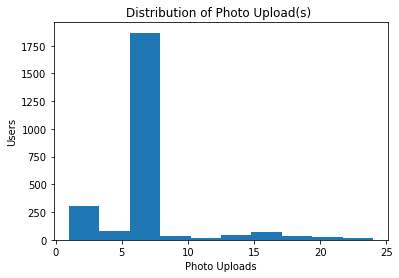

In [16]:
# univariate plot of photos uploaded
plt.hist(data = df_master , x = 'PhotoUpload');
# plt.ylim(0,600)
plt.title('Distribution of Photo Upload(s) ')
plt.xlabel('Photo Uploads')
plt.ylabel('Users')

The plot shows a fairly right skewed distribution with the majority of guide users uploading a photo 7 times to the guide

We can further extend our analysis to show the relationship between Photos Uploaded to the guide and the guide session

Text(0.5, 0, 'Photo Upload')

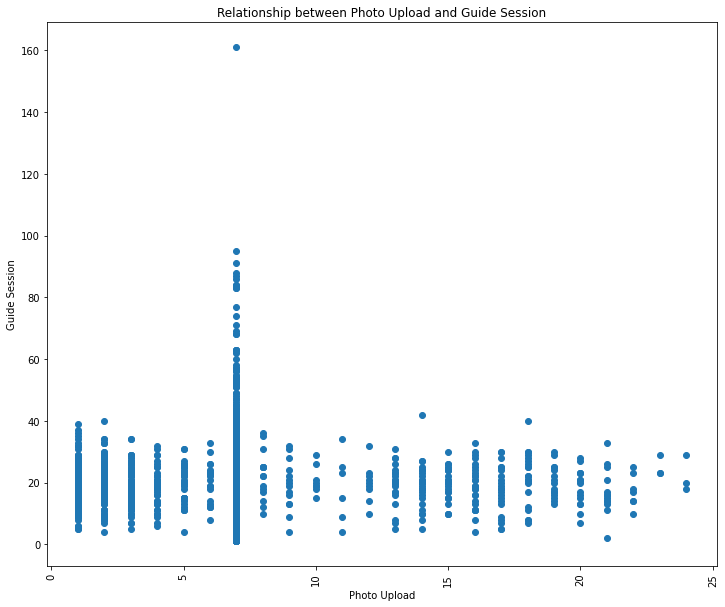

In [17]:
# bivariate plot of photos uploaded vs. guide session
plt.figure(figsize = [12, 10])
base_color = sb.color_palette()[0]
plt.scatter(data = df_master , y = 'GuideSession' , x = 'PhotoUpload')
plt.title('Relationship between Guide Session and Photo Upload')
plt.xticks(rotation='vertical')
plt.ylabel('Guide Session')
plt.xlabel('Photo Upload')

The plot suggests that users who upload the most photos, open up the guide the longest on their phones

Lastly, I would like to explore how PhotoUpload relates to Guide Download. In the previous plots we saw that users that upload the most photos use the guide often so do these users also download the guide often

Text(0.5, 1.0, 'Relationship between Photo Upload and Guide Download')

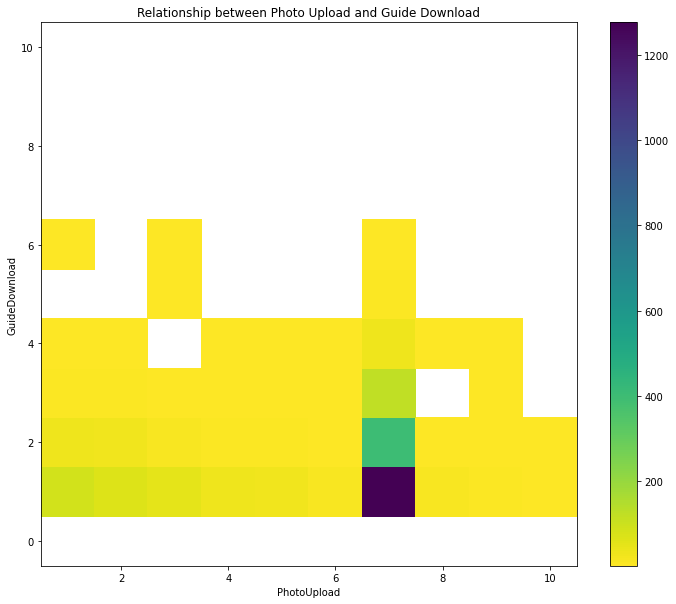

In [21]:
plt.figure(figsize = [12, 10])
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = df_master, y = 'GuideDownload', x = 'PhotoUpload',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.ylabel('GuideDownload')
plt.xlabel('PhotoUpload')
plt.title('Relationship between Guide Download and Photo Upload')

The plot suggests that guide downloads are pretty low for users who upload the most photos

### Conclusion

The highest majority of guide users upload at least 7 photos to the guide. The data also suggested that users who uploading more photos open the guide the most. However, this number did not match for people who download the guide. 
There should be another factor affecting guide downloads and we can't just rely on photouploads.